In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Importando bibliotecas para buscar arquivos.

In [ ]:
import re
import os
import shutil

###Criando funções para obter os nomes das imagens.

In [ ]:
object_names = [] #Lista para guardar os nomes das imagens.
main_folder = r'../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99' #Caminho para a pasta das imagens.

#Função para percorrer a pasta das imagens e salvar os arquivos .png numa lista contendo seus nomes.
def file_loop(root, dirs, files, object_names):
    for file in sorted(files):
        if not re.search(r'\.png$', file):
            continue
        object_names.append(file)

#Função auxiliar para caminhar por diretórios
def main_loop(object_names):
    for root, dirs, files in os.walk(main_folder):
        file_loop(root, dirs, files, object_names)

###Povoando a lista dos nomes das imagens.

In [ ]:
main_loop(object_names)
print(object_names)

['animal1.png', 'animal10.png', 'animal11.png', 'animal2.png', 'animal3.png', 'animal4.png', 'animal5.png', 'animal6.png', 'animal7.png', 'animal8.png', 'animal9.png', 'bunny04.png', 'bunny1.png', 'bunny10.png', 'bunny2.png', 'bunny3.png', 'bunny4.png', 'bunny5.png', 'bunny6.png', 'bunny7.png', 'bunny8.png', 'bunny9.png', 'dude0.png', 'dude1.png', 'dude10.png', 'dude11.png', 'dude12.png', 'dude2.png', 'dude4.png', 'dude5.png', 'dude6.png', 'dude7.png', 'dude8.png', 'fgen1.png', 'fgen1ap.png', 'fgen1bp.png', 'fgen1ep.png', 'fgen1fp.png', 'fgen2.png', 'fgen2dp.png', 'fgen2fp.png', 'fgen3.png', 'fgen3bp.png', 'fgen5cp.png', 'fish1.png', 'fish14.png', 'fish2.png', 'fish23.png', 'fish28.png', 'fish3.png', 'fish30.png', 'fish4.png', 'fish5.png', 'fish6.png', 'fish7.png', 'hand.png', 'hand2.png', 'hand2occ1.png', 'hand2occ2.png', 'hand2occ3.png', 'hand3.png', 'hand90.png', 'handbent1.png', 'handbent2.png', 'handdeform.png', 'handdeform2.png', 'harrier.png', 'harrier1.png', 'harrier2.png', 'ha

###Importando função para buscar o conteúdo das imagens. 

In [ ]:
from glob import glob

In [ ]:
files = sorted(glob(r'../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/*.png')) #Armazena as imagens na lista files.
print(files)

['../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal1.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal10.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal11.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal2.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal3.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal4.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal5.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal6.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal7.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal8.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal9.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/bunny04.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/bunny1.png', '../content/drive/MyDrive/Exemplos C

###Importando bibliotecas e lendo imagens na escala de cinza.

In [ ]:
import matplotlib.pyplot as plt
import skimage.io

for i in range(0, len(files)):
  files[i] = skimage.io.imread(str(files[i]),as_gray=True)

###Importando bibliotecas para pegar contornos das formas e trabalhar com matrizes.

In [ ]:
from skimage.measure import find_contours
import numpy as np

contour = [] #Lista para armazenar as coordenadas dos pixels de contorno.
cx = [] #Lista com as coordenadas x do centro das formas.
cy = [] #Lista com as coordenadas y do centro das formas.

#Pegando os contornos de cada forma e os centros das mesmas.
for i in range(0, len(files)):
    contour.append(find_contours(files[i], level=0))
    contour[i] = np.array(contour[i][0])
    cx.append(contour[i][:,0].mean()) 
    cy.append(contour[i][:,1].mean())

###Cálculo da distância ao centro de cada pixel de contorno das formas.

In [ ]:
center_distance = [] #Lista para armazenar as distâncias.

#Para cada forma, usa-se as coordenadas de cada pixel de contorno e do pixel central para 
#calcular as respectivas distâncias euclidianas.
for i in range(0, len(contour)):
    center_distance.append((contour[i][:,0] - cx[i])**2 + (contour[i][:,1] - cy[i])**2) 
    center_distance[i] = center_distance[i]**0.5


###Criando lista para armazenar as distâncias dos pixels de contorno ao central, dividindo todas as distâncias pela de maior valor.

In [ ]:
normalized_distance = []

#Percorre todos os contornos e divide cada distância pela de maior valor na i-ésima center_distance.
for i in range(0, len(center_distance)):
    normalized_distance.append(center_distance[i]/max(center_distance[i])) 

In [ ]:
print(normalized_distance[97:])

###Criando lista para guardar os índices da primeira ocorrência do maior valor das distâncias dos pixels de contorno ao central. 

In [ ]:
maximum_index_distance = []

for i in range (0, len(normalized_distance)):
    maximum_index_distance.append(center_distance[i].tolist().index(max(center_distance[i])))
    
print(maximum_index_distance)

[297, 302, 213, 301, 1, 259, 278, 247, 256, 571, 541, 34, 27, 21, 30, 25, 25, 25, 78, 0, 21, 21, 366, 314, 333, 81, 81, 179, 318, 73, 80, 0, 0, 297, 0, 0, 0, 244, 0, 323, 0, 290, 0, 325, 169, 152, 140, 134, 131, 148, 146, 161, 165, 171, 171, 489, 0, 120, 0, 0, 101, 428, 566, 506, 412, 112, 206, 413, 124, 124, 119, 119, 306, 356, 207, 206, 206, 94, 95, 90, 96, 93, 91, 94, 95, 87, 94, 94, 18, 16, 167, 114, 20, 50, 0, 82, 18, 50, 2]


###Função para colocar a maior distância no primeiro índice de cada vetor de distâncias.

In [ ]:
def vector_reorganize(vector, index):
  aux_vector = []
  for i in range(index, len(vector)):
    aux_vector.append(vector[i])
  for i in range(0, index):
    aux_vector.append(vector[i])
  return aux_vector

###Usando a função criada acima para reorganizar o vetor de distâncias normalizadas.

In [ ]:
for i in range(0, len(normalized_distance)):
  normalized_distance[i] = vector_reorganize(normalized_distance[i], maximum_index_distance[i])

In [ ]:
type(normalized_distance)

list

In [ ]:
normalized_distance = np.asarray(normalized_distance)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
normalized_distance.shape

(99,)

In [ ]:
print(normalized_distance[1])

[1.0, 0.9897846201194742, 0.9912335374286408, 0.9814002393612561, 0.9717064314124694, 0.96215632971642, 0.9527542556784407, 0.9435046346194479, 0.9344119938861911, 0.925480960378628, 0.9167162574446462, 0.9208059391160953, 0.9125054388996416, 0.9173736543385992, 0.9095525988388419, 0.9151980881276974, 0.907870012040551, 0.900740157840994, 0.907464744298909, 0.914647802278851, 0.9083385052960234, 0.9162753653113428, 0.9104876127308369, 0.919164165214404, 0.9139030694467211, 0.9088670601407971, 0.9040598987947664, 0.899485254544855, 0.8951466922317441, 0.8910476603516974, 0.8871914789705918, 0.8835813276845599, 0.8653347288532023, 0.8504617457659677, 0.8323261236696261, 0.814356974025824, 0.7994070515083802, 0.7844682541652902, 0.7695412299025607, 0.7546266773589072, 0.7397253509097371, 0.7282785286073988, 0.7320201247819574, 0.721417249823422, 0.7113094568960607, 0.7017181403289574, 0.6873592915924502, 0.6784566054954507, 0.6701289765502804, 0.656140729789764, 0.6486011885326252, 0.6416

###Matriz de distâncias usando a DTW:

In [ ]:
from fastdtw import fastdtw 

In [ ]:
N = normalized_distance.shape[0]
distance_matrix = np.zeros((N,N)) #Matriz de distâncias.
for i,a in zip(np.arange(N),normalized_distance):
  for j,b in zip(np.arange(i,N),normalized_distance[i:]):
    distance_matrix[i,j] = fastdtw(a,b)[0]
distance_matrix = distance_matrix + distance_matrix.transpose()

In [ ]:
distance_matrix.shape

(99, 99)

In [ ]:
print(len(normalized_distance))

99


In [ ]:
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(distance_matrix)
plt.figure(figsize = (30,30))
sn.heatmap(df_cm, annot=False,cmap="gray")

In [ ]:
plt.figure(figsize=(30,30))
plt.imshow(distance_matrix,cmap="gray")
plt.show()

###Criando dicionário para guardar coordenadas dos contornos, coordenadas dos centros e formas das imagens.

In [ ]:
keys = [] #Lista a ser povoada com dicionário.

for i in range(0, len(contour)):
    keys.append({})
    keys[i]["contour"] = contour[i] #Contornos
    keys[i]["distance"] = center_distance[i] #Distância dos pixels de contorno ao do centro.
    keys[i]["normalized_distance"] = normalized_distance[i] #Distância normalizada.
    keys[i]["max_index"] = maximum_index_distance[i] #Primeiro índice do maior valor da distância normalizada.
    keys[i]["shape"] = contour[i].shape[0] #Proporção da forma.
    keys[i]["form"] = files[i] #Forma pura da imagem.

###Criando dicionário para associar os nomes das imagens a todas as suas características.

In [ ]:
dictionary = {}
for i in range(0, len(contour)):
    dictionary[object_names[i]] = keys[i]

In [ ]:
print(dictionary.keys()) #Nomes das imagens

dict_keys(['animal1.png', 'animal10.png', 'animal11.png', 'animal2.png', 'animal3.png', 'animal4.png', 'animal5.png', 'animal6.png', 'animal7.png', 'animal8.png', 'animal9.png', 'bunny04.png', 'bunny1.png', 'bunny10.png', 'bunny2.png', 'bunny3.png', 'bunny4.png', 'bunny5.png', 'bunny6.png', 'bunny7.png', 'bunny8.png', 'bunny9.png', 'dude0.png', 'dude1.png', 'dude10.png', 'dude11.png', 'dude12.png', 'dude2.png', 'dude4.png', 'dude5.png', 'dude6.png', 'dude7.png', 'dude8.png', 'fgen1.png', 'fgen1ap.png', 'fgen1bp.png', 'fgen1ep.png', 'fgen1fp.png', 'fgen2.png', 'fgen2dp.png', 'fgen2fp.png', 'fgen3.png', 'fgen3bp.png', 'fgen5cp.png', 'fish1.png', 'fish14.png', 'fish2.png', 'fish23.png', 'fish28.png', 'fish3.png', 'fish30.png', 'fish4.png', 'fish5.png', 'fish6.png', 'fish7.png', 'hand.png', 'hand2.png', 'hand2occ1.png', 'hand2occ2.png', 'hand2occ3.png', 'hand3.png', 'hand90.png', 'handbent1.png', 'handbent2.png', 'handdeform.png', 'handdeform2.png', 'harrier.png', 'harrier1.png', 'harrier2

###Classificando as imagens:

In [ ]:
for i in dictionary.keys():
  if 'animal' in i:
    dictionary[i]['class'] = 0
  elif 'bunny' in i:
    dictionary[i]['class'] = 1
  elif 'dude' in i:
    dictionary[i]['class'] = 2
  elif 'fgen' in i:
    dictionary[i]['class'] = 3
  elif 'fish' in i:
    dictionary[i]['class'] = 4
  elif 'hand' in i:
    dictionary[i]['class'] = 5
  elif 'harrier' in i:
    dictionary[i]['class'] = 6
  elif 'kk0' in i:
    dictionary[i]['class'] = 7
  elif 'tool' in i:
    dictionary[i]['class'] = 8

In [ ]:
classes = []
for i in dictionary.keys():
  classes.append(dictionary[i]['class'])

In [ ]:
classes

In [ ]:
#Exemplo:
print(dictionary['kk0735.png']['class'])

7


###Criando função para plotar gráficos da forma e do contorno das imagens.

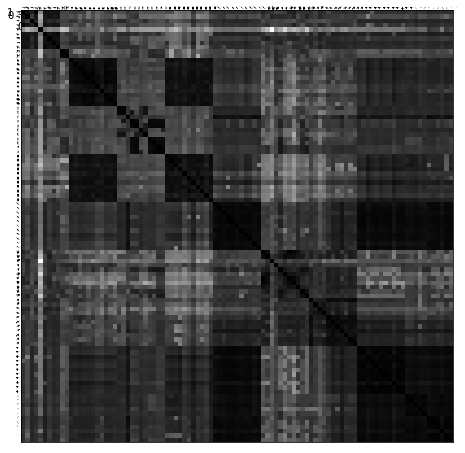

In [ ]:
plt.figure(figsize=(8, 8))
ax2 = plt.axes([0.133, 0.123, 0.75, 0.75])
#ax2 = plt.axes([0.135, 0.12, 0.75, 0.75])
#plt.axes(ax1)
#plt.tight_layout()
#for i, j in zip(range(101,10101,100),range(0,99)):#9901
for i, j in zip(range(2,101),range(0,98)):
  a = 100*(i-1)+1
  plt.subplot(100, 100, a)
  plt.axis('off')
  plt.xticks(())
  plt.yticks(())
  plt.imshow(files[j], 'gray')
  plt.subplot(100, 100, i)
  plt.axis('off')
  plt.xticks(())
  plt.yticks(())
  plt.imshow(files[j], 'gray')
plt.subplot(100,100,102)
plt.axes(ax2)
plt.xticks(())
plt.yticks(())
plt.imshow(distance_matrix,cmap="gray")

plt.show()

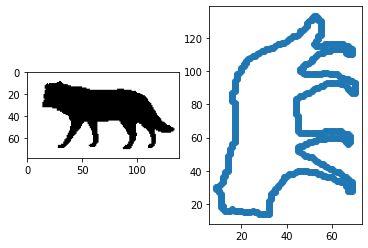

In [ ]:
def graphic_form_contour(name): #O parâmetro a ser passado é o nome de uma das imagens.
    plt.subplot(121)
    plt.imshow(dictionary[name]['form'],'gray') #Usando os dados do dicionário (forma)
    plt.subplot(122)
    plt.scatter(dictionary[name]['contour'][:,0],dictionary[name]['contour'][:,1]) #Usando os dados do dicionário (contorno)
    plt.show()

#Exemplo:
graphic_form_contour('animal11.png')

###Criando funções para plotar gráficos das assinaturas das imagens (forma pura e normalizada).

In [ ]:
#Função que mostra a forma pura das assinaturas.
def signature_Image_Contour(name):
    plt.plot(np.arange(dictionary[name]['shape']), dictionary[name]['distance'])

#Função que mostra a forma normalizada das assinaturas.
def signature_Image_Contour_Normalized(name):
    plt.plot(np.arange(dictionary[name]['shape']), dictionary[name]['normalized_distance'])

In [ ]:
#Exemplo da função que plota a assinatura:
signature_Image_Contour('animal11.png')

In [ ]:
#Exemplo da função que plota a assinatura normalizada:
signature_Image_Contour_Normalized('animal11.png')

###Salvando os dados do dicionário em um arquivo .pkl.

In [ ]:
import pickle

pickle_file = open("banco de dados.pkl","wb")
pickle.dump(dictionary, pickle_file)

In [ ]:
pickle_file.close()

###Para testar se o salvamento funcionou.

In [ ]:
with open("banco de dados.pkl","rb") as data_base:
  new_dictionary = pickle.load(data_base)

#print(new_dictionary)

#Avaliando o descritor usando KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
k_neighbors = []
for i in range(1, 12):
  k_neighbors.append(i)

In [ ]:
previsoes = []
acuracias = []
for k, i in zip(k_neighbors, range(len(k_neighbors))):
  knn = KNeighborsClassifier(n_neighbors=k, metric = 'precomputed')
  knn.fit(distance_matrix, classes) 
  previsoes.append(knn.predict(distance_matrix))
  acuracias.append(100*accuracy_score(classes, previsoes[i]))

In [ ]:
df = pd.DataFrame((zip(k_neighbors, acuracias)), columns=['Valor de K', 'Taxa de acerto (%)'])
df

,Valor de K,Taxa de acerto (%)
0,1,100.000000
1,2,96.969697
2,3,93.939394
3,4,89.898990
4,5,87.878788
5,6,85.858586
6,7,84.848485
7,8,84.848485
8,9,85.858586
9,10,85.858586


In [ ]:
indice = acuracias.index(max(acuracias))
print(f'Melhor k = {k_neighbors[indice]}')

Melhor k = 1


In [ ]:
print(classification_report(classes, previsoes[2]))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.85      1.00      0.92        11
           2       1.00      1.00      1.00        11
           3       1.00      0.82      0.90        11
           4       1.00      0.82      0.90        11
           5       1.00      0.91      0.95        11
           6       1.00      1.00      1.00        11
           7       0.85      1.00      0.92        11
           8       0.92      1.00      0.96        11

    accuracy                           0.94        99
   macro avg       0.95      0.94      0.94        99
weighted avg       0.95      0.94      0.94        99



#Kmeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=9).fit(distance_matrix)

In [ ]:
kmeans.labels_

array([1, 4, 8, 1, 5, 1, 1, 1, 1, 4, 3, 7, 7, 7, 7, 7, 7, 2, 2, 7, 7, 2,
       8, 8, 0, 3, 3, 8, 8, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 7,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 4, 6, 4, 4, 6, 6, 6, 4, 4, 4,
       1, 4, 6, 4, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)